In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
billboard_songs = pd.read_csv('../data/raw/billboard_songs.csv')
billboard_songs.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,Bill Anderson,StillBill Anderson,1.0,17.0,11.0,8.0
1,http://www.billboard.com/charts/hot-100/1967-0...,1/7/1967,11,Coming Home Soldier,Bobby Vinton,Coming Home SoldierBobby Vinton,1.0,17.0,11.0,8.0
2,http://www.billboard.com/charts/hot-100/1971-0...,7/3/1971,11,She's Not Just Another Woman,The 8th Day,She's Not Just Another WomanThe 8th Day,1.0,17.0,11.0,8.0
3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,Bay City Rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,8.0
4,http://www.billboard.com/charts/hot-100/1979-0...,9/29/1979,11,Pop Muzik,M,Pop MuzikM,1.0,17.0,11.0,8.0


In [3]:
billboard_songs.shape

(325695, 10)

# Missingness Analysis



There are some missing values in the data, principally contained in the columns: **Instance**, **Previous Week Position**, **Peak Position**, and **Weeks on Chart**. Songs that first appear on the chart will always have 

In [4]:
billboard_songs.isnull().mean()

url                       0.000000
WeekID                    0.000000
Week Position             0.000000
Song                      0.000000
Performer                 0.000000
SongID                    0.000000
Instance                  0.015966
Previous Week Position    0.110484
Peak Position             0.015966
Weeks on Chart            0.015966
dtype: float64

In [5]:
billboard_songs[billboard_songs['Previous Week Position'].isnull()].isnull().mean()

url                       0.000000
WeekID                    0.000000
Week Position             0.000000
Song                      0.000000
Performer                 0.000000
SongID                    0.000000
Instance                  0.144509
Previous Week Position    1.000000
Peak Position             0.144509
Weeks on Chart            0.144509
dtype: float64

# Cleaning: Billboard Songs


For preliminary cleaning I just drop the URL column since that contains information I don't need, and then I reorder the columns so that the order makes more sense. I also change the WeekID column to a datatime column so that I can sort by it.

In [6]:
# Clean billboard songs

def clean_billboard_songs(df):
    
    clean_col_order = ['SongID', 
                       'Song', 
                       'Performer', 
                       'WeekID', 
                       'Week Position', 
                       'Instance', 
                       'Previous Week Position', 
                       'Peak Position', 
                       'Weeks on Chart']
    
    df = df.drop(['url'], axis=1)[clean_col_order]
    
    df['WeekID'] = pd.to_datetime(df['WeekID'], format = '%m/%d/%Y')
    
    return df
    

In [7]:
billboard_songs = clean_billboard_songs(billboard_songs)
billboard_songs.head()

,SongID,Song,Performer,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,StillBill Anderson,Still,Bill Anderson,1963-06-01,11,1.0,17.0,11.0,8.0
1,Coming Home SoldierBobby Vinton,Coming Home Soldier,Bobby Vinton,1967-01-07,11,1.0,17.0,11.0,8.0
2,She's Not Just Another WomanThe 8th Day,She's Not Just Another Woman,The 8th Day,1971-07-03,11,1.0,17.0,11.0,8.0
3,Saturday NightBay City Rollers,Saturday Night,Bay City Rollers,1975-11-29,11,1.0,17.0,11.0,8.0
4,Pop MuzikM,Pop Muzik,M,1979-09-29,11,1.0,17.0,11.0,8.0


In [8]:
billboard_songs.sort_values(by='WeekID', ascending=False).head()

,SongID,Song,Performer,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
309421,Tyler HerroJack Harlow,Tyler Herro,Jack Harlow,2020-12-26,77,NaN,NaN,NaN,NaN
309377,Bang!AJR,Bang!,AJR,2020-12-26,33,NaN,NaN,NaN,NaN
309425,Without YouThe Kid LAROI,Without You,The Kid LAROI,2020-12-26,81,NaN,NaN,NaN,NaN
309424,DiveKid Cudi,Dive,Kid Cudi,2020-12-26,80,NaN,NaN,NaN,NaN
309423,You Broke Me First.Tate McRae,You Broke Me First.,Tate McRae,2020-12-26,79,NaN,NaN,NaN,NaN


In [9]:
billboard_songs[billboard_songs['Instance'].isnull()].sort_values(by='WeekID').head()

,SongID,Song,Performer,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
314544,South Of The BorderEd Sheeran Featuring Camila...,South Of The Border,Ed Sheeran Featuring Camila Cabello & Cardi B,2020-01-04,100,NaN,NaN,NaN,NaN
314471,BanditJuice WRLD & YoungBoy Never Broke Again,Bandit,Juice WRLD & YoungBoy Never Broke Again,2020-01-04,27,NaN,NaN,NaN,NaN
314472,It's Beginning To Look A Lot Like ChristmasPer...,It's Beginning To Look A Lot Like Christmas,Perry Como And The Fontane Sisters With Mitche...,2020-01-04,28,NaN,NaN,NaN,NaN
314473,Christmas (Baby Please Come Home)Darlene Love,Christmas (Baby Please Come Home),Darlene Love,2020-01-04,29,NaN,NaN,NaN,NaN
314474,PaniniLil Nas X,Panini,Lil Nas X,2020-01-04,30,NaN,NaN,NaN,NaN


### Missingness Conclusion:


The values that are missing seem to be separated into two time periods. Any songs from 2020, regardless of whether or not they appear on the chart a single time or multiple times, have no chart information regarding their Instance, Previous Week Position, Peak Position, or Weeks on Chart. Any songs from 2019 and earlier only have missing values in Previous Week Position in instances where it was the song's first week on the chart. Since 2020 songs have no chart information (for whatever reason) I plan on just dropping these values and using 2019 and earlier data.


ALSO, while setting objects to datetime it seems that some dates could not be converted. This resulted in them being given NaT values. Since such a small portion of songs are affected by this I decided to drop any songs with NaT values after converting WeekID to datetime.

# Get rid of Christmas

There are a lot of Christmas songs in this data. Since I don't want to be recommending this music to users in the middle of the year, I'm just going to try and remove it all together. There isn't a single fantastic way of doing this. For now I'm going to just use **instance** as my basis for removing.


Christmas songs will enter and exit the charts multiple times, giving them a higher instance value than normal. I am going to remove any songs that have an instance value over 3 to try to weed out Christmas Music. This will also remove some songs that are not Christmas songs, but given the distribution of instance values this is not a huge deal as a majority of songs have instance values of 3 or under.

<AxesSubplot:>

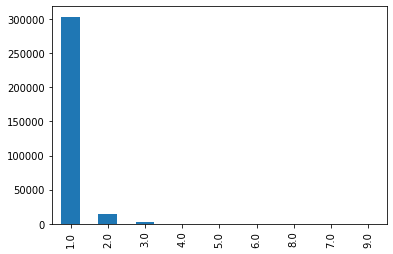

In [10]:
billboard_songs['Instance'].value_counts().plot.bar()

In [11]:
# First find the song ID's of all songs that have high instance values
# We cannot just filter and drop based on instance alone since a song with an instance value of 5 has entries
# with instance values of 1, 2, 3, 4, and 5.

songs_to_drop = billboard_songs[billboard_songs['Instance'] > 3]['SongID'].unique()
songs_to_drop

array(['Lost!Coldplay With Jay-Z', 'HomeMichael Buble',
       'Donald TrumpMac Miller', 'ElectricitySilk City x Dua Lipa',
       'On My Way To YouCody Johnson', 'El AmanteNicky Jam',
       'MariaJohnny Mathis', 'Nothing Left To LoseMat Kearney',
       'Ocean EyesBillie Eilish',
       'Let Me Down SlowlyAlec Benjamin Featuring Alessia Cara',
       'GoosebumpsTravis Scott', 'FearlessTaylor Swift',
       'No Me Doy Por VencidoLuis Fonsi', 'Last ChristmasWham!',
       "It's The Most Wonderful Time Of The YearAndy Williams",
       'Million ReasonsLady Gaga',
       'Father Stretch My Hands Pt. 1Kanye West', 'GinzaJ Balvin',
       'Jingle Bell RockBobby Helms', 'I SmileKirk Franklin',
       'Hold You (Hold Yuh)Gyptian', 'LovelyBillie Eilish & Khalid',
       'The Little Drummer BoyThe Harry Simeone Chorale',
       'We WereKeith Urban',
       'Wish WishDJ Khaled Featuring Cardi B & 21 Savage',
       "You Don't Own MeGrace Featuring G-Eazy",
       'ThrillerMichael Jackson',
    

In [12]:
billboard_songs = billboard_songs[~billboard_songs['SongID'].isin(songs_to_drop)]
billboard_songs

,SongID,Song,Performer,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,StillBill Anderson,Still,Bill Anderson,1963-06-01,11,1.0,17.0,11.0,8.0
1,Coming Home SoldierBobby Vinton,Coming Home Soldier,Bobby Vinton,1967-01-07,11,1.0,17.0,11.0,8.0
2,She's Not Just Another WomanThe 8th Day,She's Not Just Another Woman,The 8th Day,1971-07-03,11,1.0,17.0,11.0,8.0
3,Saturday NightBay City Rollers,Saturday Night,Bay City Rollers,1975-11-29,11,1.0,17.0,11.0,8.0
4,Pop MuzikM,Pop Muzik,M,1979-09-29,11,1.0,17.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...
325690,You Make It EasyJason Aldean,You Make It Easy,Jason Aldean,2018-03-17,38,1.0,38.0,28.0,6.0
325691,You Make It EasyJason Aldean,You Make It Easy,Jason Aldean,2018-03-24,34,1.0,38.0,28.0,7.0
325692,You Make It EasyJason Aldean,You Make It Easy,Jason Aldean,2018-03-31,36,1.0,34.0,28.0,8.0
325693,You Make It EasyJason Aldean,You Make It Easy,Jason Aldean,2018-04-07,34,1.0,36.0,28.0,9.0


# FINAL Clean Data: Billboard Songs

In [23]:
billboard_songs = pd.read_csv('../data/raw/billboard_songs.csv')

In [24]:
# Clean billboard songs

def clean_billboard_songs(df):
    
    # Drop irrelevant column and reorder columns
    clean_col_order = ['SongID', 
                       'Song', 
                       'Performer', 
                       'WeekID', 
                       'Week Position', 
                       'Instance', 
                       'Previous Week Position', 
                       'Peak Position', 
                       'Weeks on Chart']
    df = df.drop(['url'], axis=1)[clean_col_order]
    
    # Drop Songs from 2020
    # Dropping instances of NA values is the same as dropping songs from 2020 since
    # 2020 songs have no chart info
    df = df[~df['Instance'].isnull()]
    
    # Convert WeekID to datetime
    df['WeekID'] = pd.to_datetime(df['WeekID'], format = '%m/%d/%Y').reset_index(drop=True)
    
    # Drop any values that could not be converted to datetime
    df = df[~df['WeekID'].isnull()]
    
    # CHRISTMAS CLEANING
    songs_to_drop = df[df['Instance'] > 3]['SongID'].unique()
    df = df[~df['SongID'].isin(songs_to_drop)]

    
    return df.reset_index(drop=True)

In [25]:
billboard_songs = clean_billboard_songs(billboard_songs)
billboard_songs

,SongID,Song,Performer,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,StillBill Anderson,Still,Bill Anderson,1963-06-01,11,1.0,17.0,11.0,8.0
1,Coming Home SoldierBobby Vinton,Coming Home Soldier,Bobby Vinton,1967-01-07,11,1.0,17.0,11.0,8.0
2,She's Not Just Another WomanThe 8th Day,She's Not Just Another Woman,The 8th Day,1971-07-03,11,1.0,17.0,11.0,8.0
3,Saturday NightBay City Rollers,Saturday Night,Bay City Rollers,1975-11-29,11,1.0,17.0,11.0,8.0
4,Pop MuzikM,Pop Muzik,M,1979-09-29,11,1.0,17.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...
314205,The First TimeSurface,The First Time,Surface,2018-03-17,63,1.0,82.0,63.0,2.0
314206,The First TimeSurface,The First Time,Surface,2018-03-24,49,1.0,63.0,49.0,3.0
314207,The First TimeSurface,The First Time,Surface,2018-03-31,40,1.0,49.0,40.0,4.0
314208,The First TimeSurface,The First Time,Surface,2018-04-07,33,1.0,40.0,33.0,5.0


In [26]:
billboard_songs[billboard_songs['Instance'] == 4]['Song'].unique()[:500]

array([], dtype=object)

# Feature Engineering

It's great that we already have all of these chart characteristics for each song, but I want to summarize/condense these features so that I can tell which songs are more popular than others. This also lets me condense the data more so that it functions better on the EC2 instance.

Features that I want:



- first_week: The first week a song appeared on the chart
- last_week: The last week a song appeared on the chart
- peak_position: The highest position a song held while it was on the chart
- avg_position: The average position a song held on the chart


In [27]:
billboard_songs_stats = pd.DataFrame()

In [28]:
%%time

temp_song_stats = billboard_songs.groupby('SongID').agg({
    'WeekID' : ['min', 'max'],
    'Peak Position' : 'min',
    'Week Position' : 'mean'
}).reset_index()

temp_song_stats.head()

Wall time: 196 ms


SongID     WeekID             \
                                                            min        max   
0                        "B" GirlsYoung And Restless 1990-05-05 1990-08-11   
1  "Cherry Cherry" from Hot August NightNeil Diamond 1973-03-17 1973-05-19   
2  "Having A Party" MedleyThe Ovations (Featuring... 1973-10-13 1973-12-08   
3                             "Joy" Pt. IIsaac Hayes 1973-12-22 1974-02-16   
4                         "Roots" MedleyQuincy Jones 1977-03-05 1977-04-16   

  Peak Position Week Position  
            min          mean  
0          54.0     71.000000  
1          31.0     47.900000  
2          56.0     76.000000  
3          30.0     43.000000  
4          57.0     70.571429

In [29]:
%%time

billboard_songs_stats['SongID'] = temp_song_stats['SongID']

billboard_songs_stats['first_week'] = temp_song_stats['WeekID']['min']

billboard_songs_stats['last_week'] = temp_song_stats['WeekID']['max']

billboard_songs_stats['peak_position'] = temp_song_stats['Peak Position']['min']

billboard_songs_stats['avg_position'] = temp_song_stats['Week Position']['mean']

Wall time: 29.8 ms


In [33]:
billboard_songs_stats

,SongID,first_week,last_week,peak_position,avg_position
0,"""B"" GirlsYoung And Restless",1990-05-05,1990-08-11,54.0,71.000000
1,"""Cherry Cherry"" from Hot August NightNeil Diamond",1973-03-17,1973-05-19,31.0,47.900000
2,"""Having A Party"" MedleyThe Ovations (Featuring...",1973-10-13,1973-12-08,56.0,76.000000
3,"""Joy"" Pt. IIsaac Hayes",1973-12-22,1974-02-16,30.0,43.000000
4,"""Roots"" MedleyQuincy Jones",1977-03-05,1977-04-16,57.0,70.571429
...,...,...,...,...,...
28164,teachmeMusiq Soulchild,2007-05-26,2007-10-06,42.0,60.750000
28165,whoa (mind in awe)XXXTENTACION,2018-12-22,2019-01-12,37.0,70.666667
28166,whoknowsMusiq,2004-04-24,2004-07-17,65.0,84.461538
28167,www.memoryAlan Jackson,2000-11-04,2001-02-10,45.0,63.400000
